In [197]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [198]:
meme = pd.read_csv('../data/processed/meme.csv')
ai = pd.read_csv('../data/processed/ai.csv')
rwa = pd.read_csv('../data/processed/rwa.csv')
gaming = pd.read_csv('../data/processed/gaming.csv')
meme.shape, ai.shape, rwa.shape, gaming.shape

((33039, 10), (113423, 10), (52339, 10), (125654, 10))

In [199]:
complete = pd.concat([meme, ai, rwa, gaming], axis=0)
print(complete.shape)
complete.head()

(324455, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
0,1681689600,3.141154e-08,7.951914e-08,2.818250e-08,6.526480e-08,9.040237e+06,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
1,1681776000,6.485267e-08,2.276132e-07,5.598800e-08,1.878306e-07,3.246056e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2,1681862400,1.862740e-07,3.796318e-07,1.379781e-07,2.647504e-07,5.639813e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
3,1681948800,2.648534e-07,4.051020e-07,2.291480e-07,2.945193e-07,4.044670e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
4,1682035200,2.949180e-07,3.114699e-07,1.605779e-07,1.985193e-07,3.242627e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme


In [200]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324455 entries, 0 to 125653
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  324455 non-null  int64  
 1   open       324455 non-null  float64
 2   high       324455 non-null  float64
 3   low        324455 non-null  float64
 4   close      324455 non-null  float64
 5   volume     324455 non-null  float64
 6   name       324455 non-null  object 
 7   symbol     324455 non-null  object 
 8   id         324455 non-null  object 
 9   category   324455 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 27.2+ MB


In [201]:
duplicates = pd.read_csv('../data/raw/duplicates.csv')
print(duplicates.shape)
duplicates

(19, 4)


,id,name,symbol,category
0,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,SENATE,SENATE,gaming
1,0d8b00d2-9e0a-4489-891b-6e663a6fcd10,Turbo,TURBO,ai
2,1a5aa1bf-0512-4a7d-ac19-ddaccfbee99f,Katana Inu,KATA,gaming
3,1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677,TokenFi,TOKEN,meme
4,1bc28038-aa5b-4e3d-9ad9-eaf8cbfed677,TokenFi,TOKEN,ai
5,1c1cd416-b027-4d73-9d4d-0a9edc63524d,Chromia,CHR,gaming
6,4885df43-d6b8-4aa2-ba26-245b24d09e50,Cere Network,CERE,gaming
7,68221f51-660f-4bed-88e4-680165a9be0c,Kadena,KDA,gaming
8,85ec7d3f-bc7a-4c7a-83c6-1685f18f42fb,Echelon Prime,PRIME,gaming
9,8b88329d-a168-4590-a664-110db3c90308,Phantasma,SOUL,gaming


In [202]:
for index, row in duplicates.iterrows():
    id = row['id']
    category = row['category']
    complete = complete[~((complete['id'] == id) & (complete['category'] == category))]

In [203]:
# check amount of record grouping by id and show it's corresponding name
token_info = complete.groupby('id')['name'].value_counts()
token_info.describe()

count     250.000000
mean     1211.248000
std       644.484591
min        51.000000
25%       941.750000
50%      1158.500000
75%      1422.500000
max      3701.000000
Name: count, dtype: float64

In [204]:
token_info.head()

id                                    name          
02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39  Pepe               548
040f0133-1654-4e4e-85ac-417155ca814f  Bittensor          330
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130  SENATE            1035
049abaff-71e0-4b1a-bcee-942cb1630222  Dark Frontiers     375
04ad4e18-9643-458b-b805-e2d767a161e4  Swash             1081
Name: count, dtype: int64

In [205]:
# get the ids from the ones that the value count is greater than 990
ids = token_info[token_info > 990].index.get_level_values(0).unique()
ids

Index(['0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130',
       '04ad4e18-9643-458b-b805-e2d767a161e4',
       '050cd820-2c82-4222-892c-e6f2859625c7',
       '05bf91a3-52e5-40ef-b09d-0c471617116e',
       '06963e10-2042-41d3-9583-acb4135460dc',
       '0844705f-10ed-42ca-b483-914b7d59e351',
       '0bb97d30-b5bb-45d6-b105-e49436cace0e',
       '0d0d9689-bf75-41ee-9555-aa2f2ca0186b',
       '0d1428e8-2b88-4314-9b1e-aa664b34a5fe',
       '0f2d0434-2ff5-4166-8d59-5cb1e5b102e1',
       ...
       'f14d3862-f857-4705-8fda-40da9c7aa198',
       'f2cfff3b-a8ae-434f-b9e3-1c81a0ba2f81',
       'f59f39ff-5230-42bb-acce-7767dc84cd83',
       'f5bf148f-d833-408a-83eb-50e12d2139ee',
       'fc58d32a-af0e-43db-be43-2ad2f257151c',
       'fcb726c7-364f-4252-8ee8-70b0bbbd8791',
       'fefa947d-7719-4915-b24f-29a25ab34e80',
       'fefc437d-46fa-4470-9ffe-e6c7219a1f9d',
       'ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab',
       'ffaebc24-053e-428e-a84d-be836e4f8a3a'],
      dtype='object', name='id', length=181)

In [206]:
# filter the complete dataset with the ids that have more than 990 records
filtered = complete[complete['id'].isin(ids)]
print(filtered.shape)
filtered.head()

(267662, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
548,1622851200,1.899321e-10,1.899321e-10,1.850572e-10,1.850572e-10,528.165422,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
549,1622937600,1.624784e-10,1.626550e-10,1.140629e-10,1.142160e-10,5652.080469,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
550,1623024000,9.419727e-11,1.027495e-10,9.412420e-11,1.027495e-10,246.141853,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
551,1623110400,1.364552e-10,1.364552e-10,1.097132e-10,1.097132e-10,6152.783113,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
552,1623196800,1.040116e-10,1.098746e-10,9.643564e-11,9.648047e-11,1502.344034,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [207]:
# get the first timestamp for each id
first_timestamp = filtered.groupby('id').timestamp.min()
print(first_timestamp.shape)
first_timestamp.head()

(181,)


id
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130    1639526400
04ad4e18-9643-458b-b805-e2d767a161e4    1635638400
050cd820-2c82-4222-892c-e6f2859625c7    1571184000
05bf91a3-52e5-40ef-b09d-0c471617116e    1622851200
06963e10-2042-41d3-9583-acb4135460dc    1626220800
Name: timestamp, dtype: int64

In [208]:
first_timestamp.sort_values()

id
7d793fa7-5fc6-432a-b26b-d1b10769d42e    1409011200
57d1ac75-9212-45fc-9caa-2c0790c48398    1440460800
7ab662b2-2574-4e48-96ea-dc8eb4545a0b    1464048000
0d1428e8-2b88-4314-9b1e-aa664b34a5fe    1467676800
d1f48a57-2c48-4512-abd6-90e8c29e5aba    1493251200
                                           ...    
1a5aa1bf-0512-4a7d-ac19-ddaccfbee99f    1640217600
199c287f-3646-49cf-afd3-e17758f66cf0    1640649600
e365ad15-0867-4b03-864e-1ab59f21ef00    1640908800
c2973207-8df8-4210-82e7-1693d55c7ec5    1640908800
bc000886-31af-4aa1-9b4e-e0ec9546dfca    1641859200
Name: timestamp, Length: 181, dtype: int64

In [209]:
# show the minimum timestamp for all
max_min_timestamp = first_timestamp.max()
print(max_min_timestamp, pd.to_datetime(max_min_timestamp, unit='s'))

1641859200 2022-01-11 00:00:00


In [210]:
# in complete check in how many rows the timestamp is 1409011200
filtered = filtered[filtered.timestamp == max_min_timestamp]['id']

In [211]:
# from complete just remain the rows that are in filtered
complete = complete[complete['id'].isin(filtered)]
print(complete.shape)
complete.head()

(266601, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
548,1622851200,1.899321e-10,1.899321e-10,1.850572e-10,1.850572e-10,528.165422,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
549,1622937600,1.624784e-10,1.626550e-10,1.140629e-10,1.142160e-10,5652.080469,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
550,1623024000,9.419727e-11,1.027495e-10,9.412420e-11,1.027495e-10,246.141853,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
551,1623110400,1.364552e-10,1.364552e-10,1.097132e-10,1.097132e-10,6152.783113,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
552,1623196800,1.040116e-10,1.098746e-10,9.643564e-11,9.648047e-11,1502.344034,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [212]:
token_info2 = complete.groupby('id')['name'].value_counts()
token_info2.describe()

count     180.000000
mean     1481.116667
std       531.027730
min       996.000000
25%      1092.250000
50%      1274.000000
75%      1528.000000
max      3701.000000
Name: count, dtype: float64

In [213]:
token_info2

id                                    name            
0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130  SENATE              1035
04ad4e18-9643-458b-b805-e2d767a161e4  Swash               1081
050cd820-2c82-4222-892c-e6f2859625c7  ROOBEE              1827
05bf91a3-52e5-40ef-b09d-0c471617116e  Catgirl             1093
06963e10-2042-41d3-9583-acb4135460dc  Mist                1179
                                                          ... 
fcb726c7-364f-4252-8ee8-70b0bbbd8791  The Graph           1399
fefa947d-7719-4915-b24f-29a25ab34e80  Bird.Money          1421
fefc437d-46fa-4470-9ffe-e6c7219a1f9d  Electra Protocol    1201
ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab  inSure DeFi         1197
ffaebc24-053e-428e-a84d-be836e4f8a3a  Flux                1293
Name: count, Length: 180, dtype: int64

In [214]:
complete.duplicated(['id', 'timestamp']).sum()

0

In [215]:
complete['timestamp'] = pd.to_datetime(complete['timestamp'], unit='s')
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
548,2021-06-05,1.899321e-10,1.899321e-10,1.850572e-10,1.850572e-10,528.165422,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
549,2021-06-06,1.624784e-10,1.626550e-10,1.140629e-10,1.142160e-10,5652.080469,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
550,2021-06-07,9.419727e-11,1.027495e-10,9.412420e-11,1.027495e-10,246.141853,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
551,2021-06-08,1.364552e-10,1.364552e-10,1.097132e-10,1.097132e-10,6152.783113,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
552,2021-06-09,1.040116e-10,1.098746e-10,9.643564e-11,9.648047e-11,1502.344034,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [216]:
# just remain the rows with timestamp greater or equal than 1641859200
complete = complete[complete.timestamp >= pd.to_datetime(max_min_timestamp, unit='s')]
print(complete.shape)
complete.head()

(179054, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
663,2022-01-11,1.998704e-09,2.548288e-09,1.908135e-09,2.109732e-09,168384.013657,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
664,2022-01-12,2.021652e-09,3.001679e-09,1.859690e-09,2.267492e-09,158181.605737,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
665,2022-01-13,2.229984e-09,2.581070e-09,2.090303e-09,2.168495e-09,93030.106110,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
666,2022-01-14,2.156560e-09,2.597417e-09,2.024773e-09,2.208654e-09,95901.377317,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
667,2022-01-15,2.404226e-09,2.591479e-09,2.094595e-09,2.438863e-09,107107.316236,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [217]:
# reset the index
complete.reset_index(drop=True, inplace=True)

In [218]:
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
0,2022-01-11,1.998704e-09,2.548288e-09,1.908135e-09,2.109732e-09,168384.013657,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
1,2022-01-12,2.021652e-09,3.001679e-09,1.859690e-09,2.267492e-09,158181.605737,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
2,2022-01-13,2.229984e-09,2.581070e-09,2.090303e-09,2.168495e-09,93030.106110,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
3,2022-01-14,2.156560e-09,2.597417e-09,2.024773e-09,2.208654e-09,95901.377317,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
4,2022-01-15,2.404226e-09,2.591479e-09,2.094595e-09,2.438863e-09,107107.316236,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [219]:
# Data manipulation
# ==============================================================================
import sys
import os
import warnings
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.graphics.tsaplots import plot_acf

# Modelling and Forecasting
# ==============================================================================
import sklearn
import skforecast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import  HistGradientBoostingRegressor
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import bayesian_search_forecaster_multiseries
from skforecast.model_selection_multiseries import select_features_multiseries
from skforecast.plot import set_dark_theme
from skforecast.preprocessing import series_long_to_dict
from skforecast.preprocessing import exog_long_to_dict

# Warnings configuration
# ==============================================================================
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.13.0
Version scikit-learn: 1.5.2
Version pandas: 2.2.3
Version numpy: 1.26.4


In [220]:
# #standardize close in complete
# scaler = StandardScaler()
# complete['close'] = scaler.fit_transform(complete[['close']])
# complete.head()
# standardize open, high, low, close and volume
scaler = StandardScaler()
complete[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(complete[['open', 'high', 'low', 'close', 'volume']])
complete.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
0,2022-01-11,-0.105014,-0.105267,-0.104797,-0.104957,-0.154310,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
1,2022-01-12,-0.105014,-0.105267,-0.104797,-0.104957,-0.154410,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
2,2022-01-13,-0.105014,-0.105267,-0.104797,-0.104957,-0.155050,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
3,2022-01-14,-0.105014,-0.105267,-0.104797,-0.104957,-0.155021,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme
4,2022-01-15,-0.105014,-0.105267,-0.104797,-0.104957,-0.154911,Catgirl,CATGIRL,05bf91a3-52e5-40ef-b09d-0c471617116e,meme


In [221]:
series = complete[['timestamp', 'id', 'name', 'close']]
exog = complete[['timestamp', 'id', 'open', 'high', 'low']]
series.shape, exog.shape

((179054, 4), (179054, 5))

In [222]:
# do one hot encode for category
# exog = pd.get_dummies(exog, columns=['category'], drop_first=True, dtype=np.float64)

In [223]:
exog.head()

,timestamp,id,open,high,low
0,2022-01-11,05bf91a3-52e5-40ef-b09d-0c471617116e,-0.105014,-0.105267,-0.104797
1,2022-01-12,05bf91a3-52e5-40ef-b09d-0c471617116e,-0.105014,-0.105267,-0.104797
2,2022-01-13,05bf91a3-52e5-40ef-b09d-0c471617116e,-0.105014,-0.105267,-0.104797
3,2022-01-14,05bf91a3-52e5-40ef-b09d-0c471617116e,-0.105014,-0.105267,-0.104797
4,2022-01-15,05bf91a3-52e5-40ef-b09d-0c471617116e,-0.105014,-0.105267,-0.104797


In [224]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179054 entries, 0 to 179053
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  179054 non-null  datetime64[ns]
 1   id         179054 non-null  object        
 2   open       179054 non-null  float64       
 3   high       179054 non-null  float64       
 4   low        179054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.8+ MB


In [225]:
# series_dict = series_long_to_dict(
#     data      = complete,
#     series_id = 'id',
#     index     = 'timestamp',
#     values    = 'close',
#     freq      = 'D'
# )

series_dict = series_long_to_dict(
    data      = complete,
    series_id = 'id',
    index     = 'timestamp',
    values    = 'close',
    freq      = 'D'
)

exog_dict = exog_long_to_dict(
    data      = exog,
    series_id = 'id',
    index     = 'timestamp',
    freq      = 'D'
)

In [226]:
end_train = '2024-03-01 00:00:00'
series_dict_train = {k: v.loc[: end_train,] for k, v in series_dict.items()}
exog_dict_train   = {k: v.loc[: end_train,] for k, v in exog_dict.items()}
series_dict_test  = {k: v.loc[end_train:,] for k, v in series_dict.items()}
exog_dict_test    = {k: v.loc[end_train:,] for k, v in exog_dict.items()}

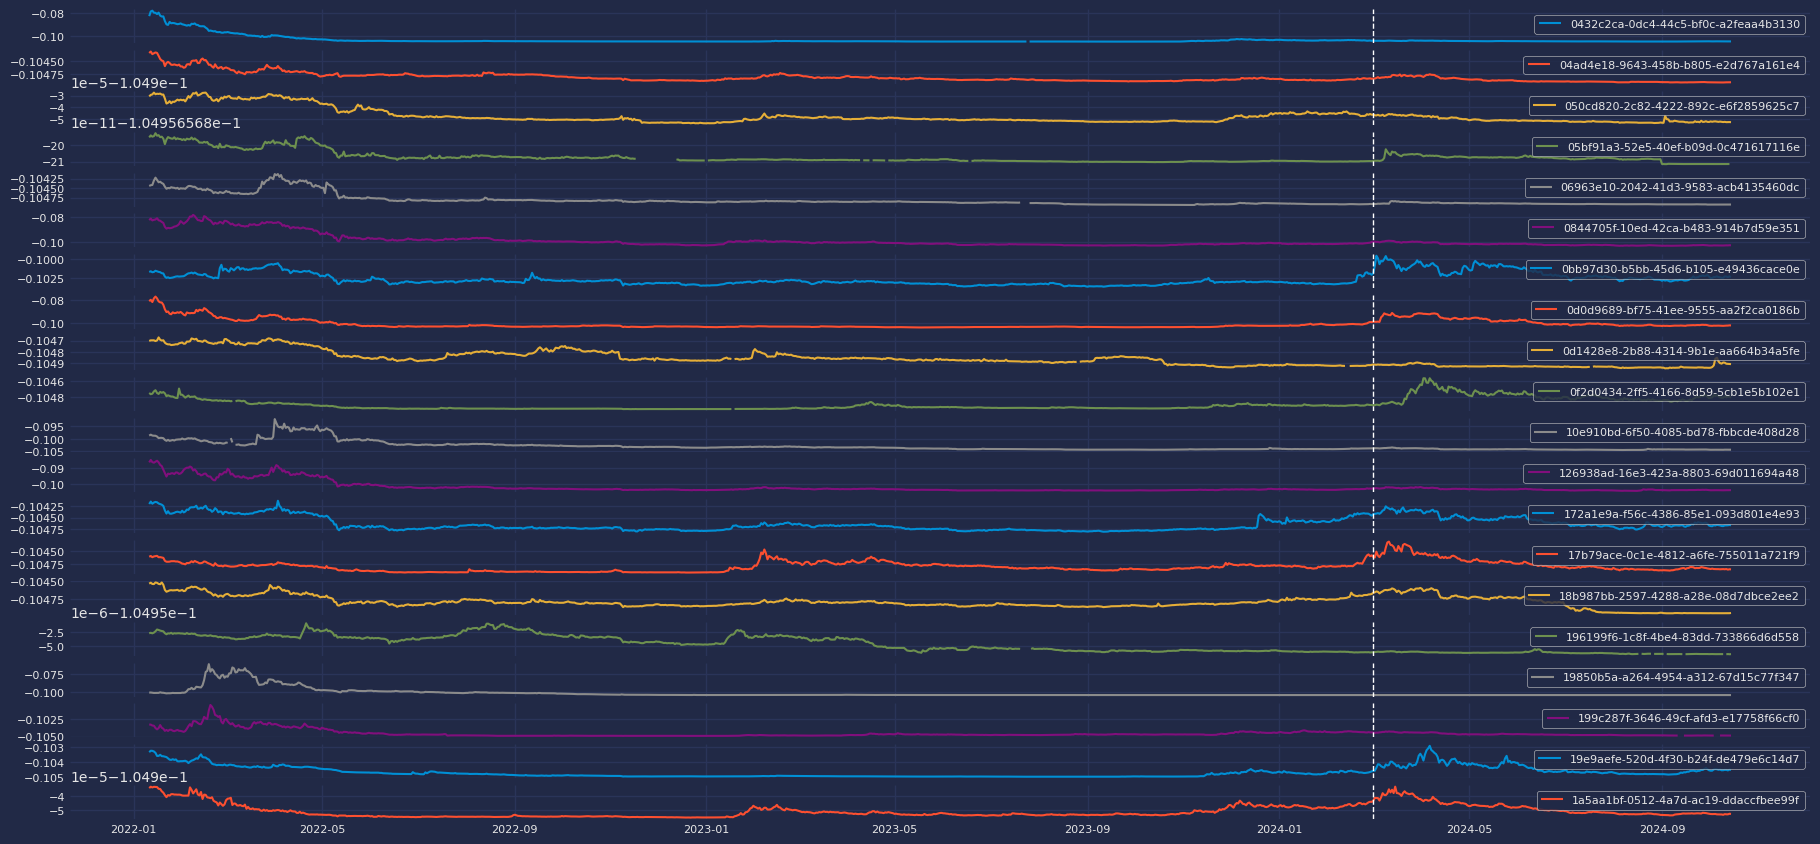

In [227]:
set_dark_theme()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Ensure there are enough colors
if len(colors) < len(series_dict):
    colors = colors * (len(series_dict) // len(colors) + 1)
fig, axs = plt.subplots(20, 1, figsize=(20, 10), sharex=True)
for i, s in enumerate(list(series_dict.values())[:20]):
    axs[i].plot(s, label=s.name, color=colors[i])
    axs[i].legend(loc='upper right', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)
    axs[i].axvline(pd.to_datetime(end_train) , color='white', linestyle='--', linewidth=1) # End train

In [228]:
for k in series_dict.keys():
    print(f"{k}:")
    try:
        print(
            f"\tTrain: len={len(series_dict_train[k])}, {series_dict_train[k].index[0]}"
            f" --- {series_dict_train[k].index[-1]}"
        )
    except:
        print(f"\tTrain: len=0")
    try:
        print(
            f"\tTest : len={len(series_dict_test[k])}, {series_dict_test[k].index[0]}"
            f" --- {series_dict_test[k].index[-1]}"
        )
    except:
        print(f"\tTest : len=0")

0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=229, 2024-03-01 00:00:00 --- 2024-10-15 00:00:00
04ad4e18-9643-458b-b805-e2d767a161e4:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=229, 2024-03-01 00:00:00 --- 2024-10-15 00:00:00
050cd820-2c82-4222-892c-e6f2859625c7:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=229, 2024-03-01 00:00:00 --- 2024-10-15 00:00:00
05bf91a3-52e5-40ef-b09d-0c471617116e:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=228, 2024-03-01 00:00:00 --- 2024-10-14 00:00:00
06963e10-2042-41d3-9583-acb4135460dc:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=229, 2024-03-01 00:00:00 --- 2024-10-15 00:00:00
0844705f-10ed-42ca-b483-914b7d59e351:
	Train: len=781, 2022-01-11 00:00:00 --- 2024-03-01 00:00:00
	Test : len=229, 2024-03-01 00:00:00 --- 2024-10-15 00:00:00
0bb97d30-b5bb-45d6-b105-e49436cace0e:
	T

In [229]:
for k in series_dict.keys():
    print(f"{k}:")
    try:
        print(f"\t{exog_dict[k].columns.to_list()}")
    except:
        print(f"\tNo exogenous variables")

0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130:
	['open', 'high', 'low']
04ad4e18-9643-458b-b805-e2d767a161e4:
	['open', 'high', 'low']
050cd820-2c82-4222-892c-e6f2859625c7:
	['open', 'high', 'low']
05bf91a3-52e5-40ef-b09d-0c471617116e:
	['open', 'high', 'low']
06963e10-2042-41d3-9583-acb4135460dc:
	['open', 'high', 'low']
0844705f-10ed-42ca-b483-914b7d59e351:
	['open', 'high', 'low']
0bb97d30-b5bb-45d6-b105-e49436cace0e:
	['open', 'high', 'low']
0d0d9689-bf75-41ee-9555-aa2f2ca0186b:
	['open', 'high', 'low']
0d1428e8-2b88-4314-9b1e-aa664b34a5fe:
	['open', 'high', 'low']
0f2d0434-2ff5-4166-8d59-5cb1e5b102e1:
	['open', 'high', 'low']
10e910bd-6f50-4085-bd78-fbbcde408d28:
	['open', 'high', 'low']
126938ad-16e3-423a-8803-69d011694a48:
	['open', 'high', 'low']
172a1e9a-f56c-4386-85e1-093d801e4e93:
	['open', 'high', 'low']
17b79ace-0c1e-4812-a6fe-755011a721f9:
	['open', 'high', 'low']
18b987bb-2597-4288-a28e-08d7dbce2ee2:
	['open', 'high', 'low']
196199f6-1c8f-4be4-83dd-733866d6d558:
	['open', 'high',

In [230]:
regressor = HistGradientBoostingRegressor(random_state=123, max_depth=5)
forecaster = ForecasterAutoregMultiSeries(
                regressor          = regressor,
                lags               = 14,
                encoding           = "ordinal",
                dropna_from_series = False
            )

forecaster.fit(series=series_dict_train, exog=exog_dict_train , suppress_warnings=True)
forecaster

ForecasterAutoregMultiSeries 
Regressor: HistGradientBoostingRegressor(max_depth=5, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 14 
Series levels (names): 0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130, 04ad4e18-9643-458b-b805-e2d767a161e4, 050cd820-2c82-4222-892c-e6f2859625c7, 05bf91a3-52e5-40ef-b09d-0c471617116e, 06963e10-2042-41d3-9583-acb4135460dc, ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Type of exogenous variable: <class 'dict'> 
Exogenous variables names: ['open', 'high', 'low'] 
Training range: '0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130': ['2022-01-11', '2024-03-01'], '04ad4e18-9643-458b-b805-e2d767a161e4': ['2022-01-11', '2024-03-01'], '050cd820-2c82-4222-892c-e6f2859625c7': ['2022-01-11', '2024-03-01'], ... 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: cat

In [231]:
predictions = forecaster.predict(steps=30, exog=exog_dict_test, suppress_warnings=True)
predictions

,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,04ad4e18-9643-458b-b805-e2d767a161e4,050cd820-2c82-4222-892c-e6f2859625c7,05bf91a3-52e5-40ef-b09d-0c471617116e,06963e10-2042-41d3-9583-acb4135460dc,0844705f-10ed-42ca-b483-914b7d59e351,0bb97d30-b5bb-45d6-b105-e49436cace0e,0d0d9689-bf75-41ee-9555-aa2f2ca0186b,0d1428e8-2b88-4314-9b1e-aa664b34a5fe,0f2d0434-2ff5-4166-8d59-5cb1e5b102e1,...,f14d3862-f857-4705-8fda-40da9c7aa198,f2cfff3b-a8ae-434f-b9e3-1c81a0ba2f81,f59f39ff-5230-42bb-acce-7767dc84cd83,f5bf148f-d833-408a-83eb-50e12d2139ee,fc58d32a-af0e-43db-be43-2ad2f257151c,fcb726c7-364f-4252-8ee8-70b0bbbd8791,fefa947d-7719-4915-b24f-29a25ab34e80,fefc437d-46fa-4470-9ffe-e6c7219a1f9d,ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab,ffaebc24-053e-428e-a84d-be836e4f8a3a
2024-03-02,-0.104157,-0.104790,-0.104815,-0.104815,-0.104815,-0.099818,-0.101760,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.003336,-0.104682,-0.104815,-0.102740,-0.102569,0.090021,-0.104815,-0.104815,-0.098026
2024-03-03,-0.104157,-0.104778,-0.104815,-0.104815,-0.104815,-0.099847,-0.100476,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.002510,-0.104682,-0.104815,-0.102740,-0.102569,0.090805,-0.104815,-0.104815,-0.096710
2024-03-04,-0.104157,-0.104758,-0.104815,-0.104815,-0.104815,-0.100003,-0.099699,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.002510,-0.104682,-0.104815,-0.103279,-0.102569,0.102722,-0.104815,-0.104815,-0.096710
2024-03-05,-0.104157,-0.104758,-0.104815,-0.104815,-0.104815,-0.100624,-0.100780,-0.099670,-0.104815,-0.104815,...,-0.104815,0.004198,-0.104682,-0.104815,-0.103279,-0.103074,0.090253,-0.104815,-0.104815,-0.096710
2024-03-06,-0.104157,-0.104778,-0.104815,-0.104815,-0.104815,-0.100139,-0.100780,-0.096438,-0.104815,-0.104815,...,-0.104815,0.004198,-0.104708,-0.104815,-0.103279,-0.102569,0.090253,-0.104815,-0.104815,-0.096710
2024-03-07,-0.104174,-0.104758,-0.104815,-0.104815,-0.104815,-0.099847,-0.100003,-0.095319,-0.104815,-0.104815,...,-0.104815,0.011552,-0.104682,-0.104815,-0.103279,-0.102569,0.090975,-0.104815,-0.104815,-0.096710
2024-03-08,-0.104174,-0.104758,-0.104815,-0.104815,-0.104815,-0.099818,-0.100003,-0.091715,-0.104815,-0.104803,...,-0.104815,0.011552,-0.104682,-0.104815,-0.103074,-0.102138,0.103444,-0.104815,-0.104815,-0.096710
2024-03-09,-0.104174,-0.104758,-0.104815,-0.104815,-0.104815,-0.099670,-0.099699,-0.091591,-0.104815,-0.104803,...,-0.104815,0.012088,-0.104682,-0.104815,-0.103074,-0.102212,0.103444,-0.104815,-0.104815,-0.096710
2024-03-10,-0.104042,-0.104758,-0.104815,-0.104815,-0.104815,-0.098647,-0.099699,-0.093798,-0.104815,-0.104815,...,-0.104815,0.005767,-0.104682,-0.104815,-0.103279,-0.101698,0.127708,-0.104815,-0.104815,-0.095319
2024-03-11,-0.104042,-0.104758,-0.104815,-0.104815,-0.104815,-0.099670,-0.100139,-0.093732,-0.104815,-0.104803,...,-0.104815,0.005764,-0.104682,-0.104815,-0.103279,-0.101698,0.127708,-0.104815,-0.104815,-0.096212


In [232]:
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = regressor, 
                 lags               = 14, 
                 encoding           = "ordinal", 
                 dropna_from_series = False
             )

metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = series_dict,
    exog                  = exog_dict,
    steps                 = 24,
    metric                = "mean_absolute_error",
    add_aggregated_metric = False,
    initial_train_size    = len(series_dict_train["0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130"]),
    fixed_train_size      = True,
    gap                   = 0,
    allow_incomplete_fold = True,
    refit                 = False,
    n_jobs                ="auto",
    verbose               = True,
    show_progress         = True,
    suppress_warnings     = True
)

display(metrics_levels)
print("")
display(backtest_predictions)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 781
Number of observations used for backtesting: 228
    Number of folds: 10
    Number skipped folds: 0 
    Number of steps per fold: 24
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 12 observations.

Fold: 0
    Training:   2022-01-11 00:00:00 -- 2024-03-01 00:00:00  (n=781)
    Validation: 2024-03-02 00:00:00 -- 2024-03-25 00:00:00  (n=24)
Fold: 1
    Training:   No training in this fold
    Validation: 2024-03-26 00:00:00 -- 2024-04-18 00:00:00  (n=24)
Fold: 2
    Training:   No training in this fold
    Validation: 2024-04-19 00:00:00 -- 2024-05-12 00:00:00  (n=24)
Fold: 3
    Training:   No training in this fold
    Validation: 2024-05-13 00:00:00 -- 2024-06-05 00:00:00  (n=24)
Fold: 4
    Training:   No training in this fold
    Validation: 2024-06-06 00:00:00 -- 2024-06-29 00:00:00  (n=24)
Fold:

100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


,levels,mean_absolute_error
0,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,0.000041
1,04ad4e18-9643-458b-b805-e2d767a161e4,0.000077
2,050cd820-2c82-4222-892c-e6f2859625c7,0.000136
3,05bf91a3-52e5-40ef-b09d-0c471617116e,0.000142
4,06963e10-2042-41d3-9583-acb4135460dc,0.000099
...,...,...
175,fcb726c7-364f-4252-8ee8-70b0bbbd8791,0.000090
176,fefa947d-7719-4915-b24f-29a25ab34e80,0.006472
177,fefc437d-46fa-4470-9ffe-e6c7219a1f9d,0.000136
178,ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab,0.000112


,0432c2ca-0dc4-44c5-bf0c-a2feaa4b3130,04ad4e18-9643-458b-b805-e2d767a161e4,050cd820-2c82-4222-892c-e6f2859625c7,05bf91a3-52e5-40ef-b09d-0c471617116e,06963e10-2042-41d3-9583-acb4135460dc,0844705f-10ed-42ca-b483-914b7d59e351,0bb97d30-b5bb-45d6-b105-e49436cace0e,0d0d9689-bf75-41ee-9555-aa2f2ca0186b,0d1428e8-2b88-4314-9b1e-aa664b34a5fe,0f2d0434-2ff5-4166-8d59-5cb1e5b102e1,...,f14d3862-f857-4705-8fda-40da9c7aa198,f2cfff3b-a8ae-434f-b9e3-1c81a0ba2f81,f59f39ff-5230-42bb-acce-7767dc84cd83,f5bf148f-d833-408a-83eb-50e12d2139ee,fc58d32a-af0e-43db-be43-2ad2f257151c,fcb726c7-364f-4252-8ee8-70b0bbbd8791,fefa947d-7719-4915-b24f-29a25ab34e80,fefc437d-46fa-4470-9ffe-e6c7219a1f9d,ff9c05cd-d3f6-4495-b8d6-7e6530a6dcab,ffaebc24-053e-428e-a84d-be836e4f8a3a
2024-03-02,-0.104157,-0.104790,-0.104815,-0.104815,-0.104815,-0.099818,-0.101760,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.003336,-0.104682,-0.104815,-0.102740,-0.102569,0.090021,-0.104815,-0.104815,-0.098026
2024-03-03,-0.104157,-0.104778,-0.104815,-0.104815,-0.104815,-0.099847,-0.100476,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.002510,-0.104682,-0.104815,-0.102740,-0.102569,0.090805,-0.104815,-0.104815,-0.096710
2024-03-04,-0.104157,-0.104758,-0.104815,-0.104815,-0.104815,-0.100003,-0.099699,-0.098647,-0.104815,-0.104815,...,-0.104815,-0.002510,-0.104682,-0.104815,-0.103279,-0.102569,0.102722,-0.104815,-0.104815,-0.096710
2024-03-05,-0.104157,-0.104758,-0.104815,-0.104815,-0.104815,-0.100624,-0.100780,-0.099670,-0.104815,-0.104815,...,-0.104815,0.004198,-0.104682,-0.104815,-0.103279,-0.103074,0.090253,-0.104815,-0.104815,-0.096710
2024-03-06,-0.104157,-0.104778,-0.104815,-0.104815,-0.104815,-0.100139,-0.100780,-0.096438,-0.104815,-0.104815,...,-0.104815,0.004198,-0.104708,-0.104815,-0.103279,-0.102569,0.090253,-0.104815,-0.104815,-0.096710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11,-0.104550,-0.104815,-0.104815,-0.104815,-0.104815,-0.102740,-0.102569,-0.102569,-0.104815,-0.104758,...,-0.104815,-0.042227,-0.104815,-0.104815,-0.104603,-0.103719,-0.085085,-0.104815,NaN,-0.101080
2024-10-12,-0.104550,-0.104815,-0.104815,-0.104815,-0.104815,-0.102740,-0.102569,-0.102569,-0.104815,-0.104758,...,-0.104815,-0.042359,-0.104815,-0.104815,-0.104603,-0.103719,-0.085584,-0.104815,-0.104815,-0.101080
2024-10-13,-0.104550,-0.104815,-0.104815,-0.104815,-0.104815,-0.102740,-0.102569,-0.102138,-0.104815,-0.104758,...,-0.104815,-0.042924,-0.104815,-0.104815,-0.104603,-0.103719,-0.085085,-0.104815,-0.104815,-0.101080
2024-10-14,-0.104550,-0.104815,-0.104815,-0.104815,-0.104815,-0.102740,-0.102569,-0.102138,-0.104815,-0.104735,...,-0.104815,-0.042924,-0.104815,-0.104815,-0.104603,-0.103719,-0.085085,-0.104815,-0.104815,-0.100917


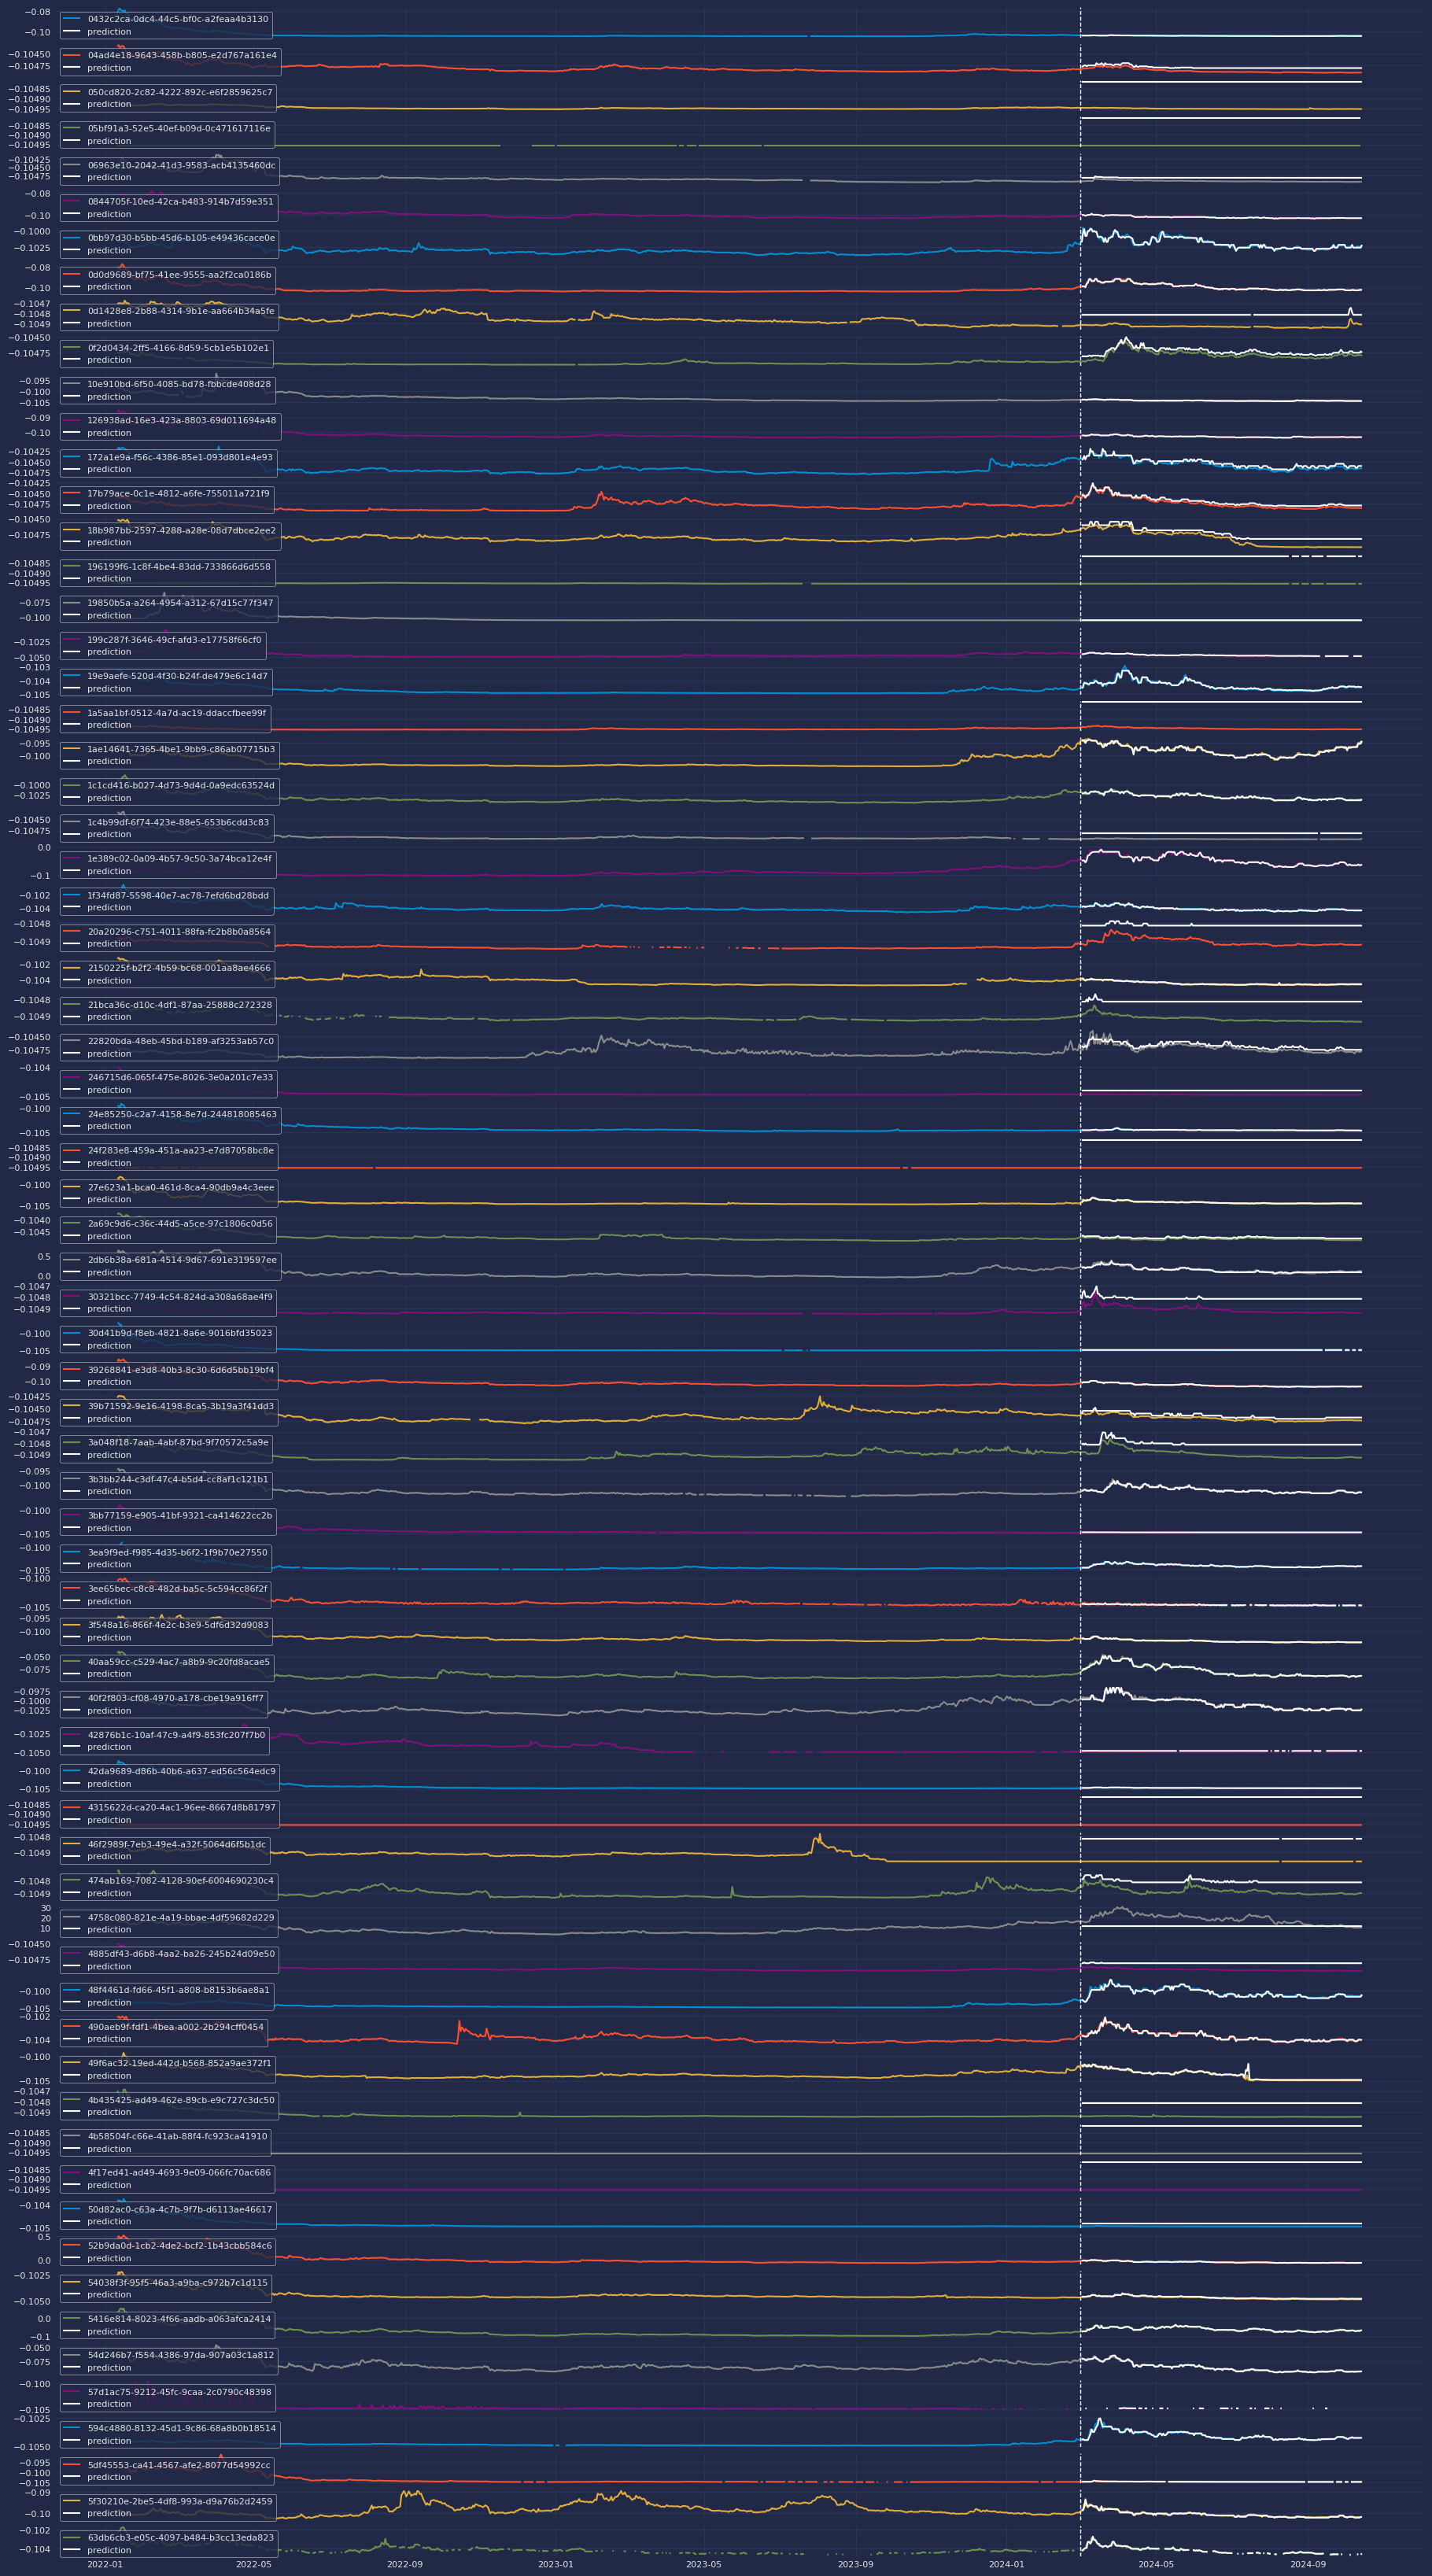

In [235]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Ensure there are enough colors
if len(colors) < len(series_dict):
    colors = colors * (len(series_dict) // len(colors) + 1)
fig, axs = plt.subplots(70, 1, figsize=(20, 40), sharex=True)
for i, s in enumerate(list(series_dict.keys())[:70]):
    axs[i].plot(series_dict[s], label=series_dict[s].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train) , color='white', linestyle='--', linewidth=1)
    try:
        axs[i].plot(backtest_predictions[s], label='prediction', color="white")
    except:
        pass
    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)